In [142]:
import numpy as np
import pandas as pd
from pandas import datetime
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
# rcParams['figure.figsize'] = 12, 7

In [143]:
def parser(x):
    return datetime.strptime(x,'%Y-%m')


data=pd.read_csv('importofrice.csv', index_col=0 ,parse_dates = [0], date_parser = parser)
training_data = data[:round(len(data)*0.85)]
test_data = data[round(len(data)*0.85):]
# data['Month'] = pd.to_datetime(data['Month'])
# training_data = data.set_index(['Month'])
# x = data['Month'].tolist()
# type(training_data)

/usr/lib/python3/dist-packages/ipykernel_launcher.py:2: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime instead.
  


In [144]:
# from datetime import datetime
len_training = len(training_data)
len_training

102

In [145]:
# indexdata=indexdata.reset_index()


In [146]:
# indexdata.Month[0]

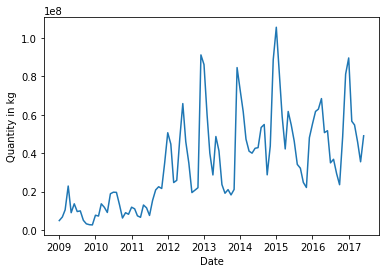

In [147]:
plt.xlabel("Date")
plt.ylabel("Quantity in kg")
plt.plot(training_data)

In [148]:
rolmean =training_data.rolling(window=12).mean()
rolstd =training_data.rolling(window=12).std()
print(rolmean, rolstd)

                Quantity
Month                   
2009-01-01           NaN
2009-02-01           NaN
2009-03-01           NaN
2009-04-01           NaN
2009-05-01           NaN
...                  ...
2017-02-01  5.289132e+07
2017-03-01  5.220354e+07
2017-04-01  5.031661e+07
2017-05-01  4.904980e+07
2017-06-01  4.882904e+07

[102 rows x 1 columns]                 Quantity
Month                   
2009-01-01           NaN
2009-02-01           NaN
2009-03-01           NaN
2009-04-01           NaN
2009-05-01           NaN
...                  ...
2017-02-01  2.028989e+07
2017-03-01  2.005575e+07
2017-04-01  1.944235e+07
2017-05-01  1.990276e+07
2017-06-01  1.988509e+07

[102 rows x 1 columns]


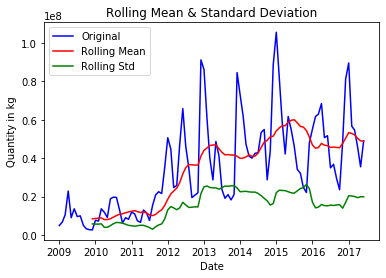

In [149]:
plt.xlabel("Date")
plt.ylabel("Quantity in kg")
orig = plt.plot(indexdata, color='blue', label='Original')
mean = plt.plot(rolmean, color='red', label='Rolling Mean')
std = plt.plot(rolstd, color='green', label='Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show(block=False)

In [150]:
from statsmodels.tsa.stattools import adfuller
print('Result of Dickey-Fuller Test:')
dftest = adfuller(training_data['Quantity'], autolag='AIC')
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Values (%s)'%key] = value
print(dfoutput)

Result of Dickey-Fuller Test:
Test Statistic                 -1.440646
p-value                         0.562643
#Lags Used                     12.000000
Number of Observations Used    89.000000
Critical Values (1%)           -3.506057
Critical Values (5%)           -2.894607
Critical Values (10%)          -2.584410
dtype: float64


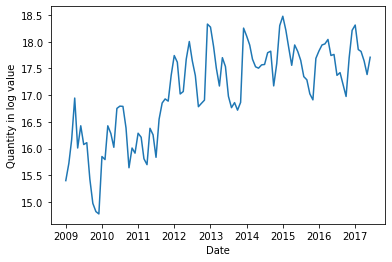

In [151]:
training_data_logscale = np.log(training_data)
plt.xlabel("Date")
plt.ylabel("Quantity in log value")
plt.plot(training_data_logscale)

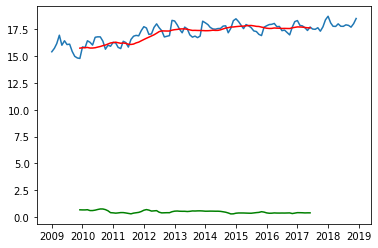

In [152]:
movingavg = training_data_logscale.rolling(window=12).mean()
movingstd = training_data_logscale.rolling(window=12).std()
plt.plot(indexdata_logscale)
plt.plot(movingavg, 'red')
plt.plot(movingstd, 'green')

In [153]:
datasetlogscalemovingavg = training_data_logscale - movingavg
datasetlogscalemovingavg.head(12)

datasetlogscalemovingavg.dropna(inplace=True)
datasetlogscalemovingavg.head(10)

,Quantity
Month,
2009-12-01,-0.959901
2010-01-01,0.075556
2010-02-01,0.012921
2010-03-01,0.622041
2010-04-01,0.533603
2010-05-01,0.274571
2010-06-01,0.974173
2010-07-01,0.957035
2010-08-01,0.895830


In [154]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    movingavg = timeseries.rolling(window=12).mean()
    movingstd = timeseries.rolling(window=12).std()
    
    orig = plt.plot(timeseries,color='blue',label='Original')
    mean = plt.plot(movingavg,color='red',label='Rolling Mean')
    std = plt.plot(movingstd,color='green',label='Rolling Std')
    plt.legend(loc='best')
    plt.title('rolling mean and standard deviation')
    plt.show(block=False)
    
    print('Result of Dickey-Fuller Test:')
    dftest = adfuller(training_data['Quantity'], autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Values (%s)'%key] = value
    print(dfoutput)

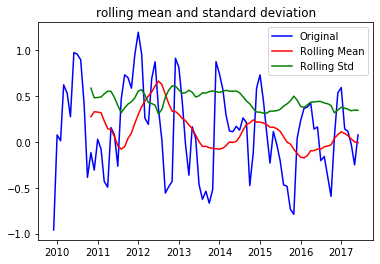

Result of Dickey-Fuller Test:
Test Statistic                 -1.440646
p-value                         0.562643
#Lags Used                     12.000000
Number of Observations Used    89.000000
Critical Values (1%)           -3.506057
Critical Values (5%)           -2.894607
Critical Values (10%)          -2.584410
dtype: float64


In [155]:
test_stationarity(datasetlogscalemovingavg)

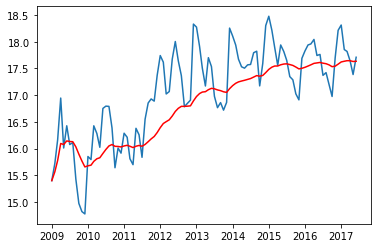

In [156]:
exp_decay_wt_avg = training_data_logscale.ewm(halflife=12, min_periods=0, adjust=True).mean()
plt.plot(training_data_logscale)
plt.plot(exp_decay_wt_avg,color='red')

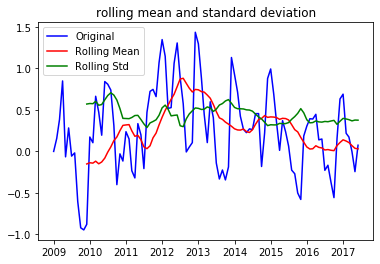

Result of Dickey-Fuller Test:
Test Statistic                 -1.440646
p-value                         0.562643
#Lags Used                     12.000000
Number of Observations Used    89.000000
Critical Values (1%)           -3.506057
Critical Values (5%)           -2.894607
Critical Values (10%)          -2.584410
dtype: float64


In [157]:
data_logscale_minus_moving_exp_decay_avg = training_data_logscale - exp_decay_wt_avg
test_stationarity(data_logscale_minus_moving_exp_decay_avg)

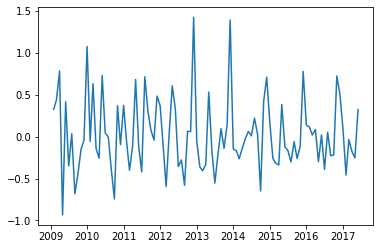

In [158]:
datasetlogdiffshifting = training_data_logscale - training_data_logscale.shift()
plt.plot(datasetlogdiffshifting)

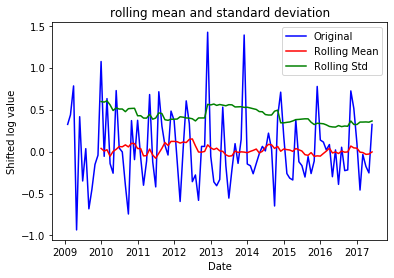

Result of Dickey-Fuller Test:
Test Statistic                 -1.440646
p-value                         0.562643
#Lags Used                     12.000000
Number of Observations Used    89.000000
Critical Values (1%)           -3.506057
Critical Values (5%)           -2.894607
Critical Values (10%)          -2.584410
dtype: float64


In [159]:
datasetlogdiffshifting.dropna(inplace=True)
plt.xlabel("Date")
plt.ylabel("Shifted log value")
test_stationarity(datasetlogdiffshifting)

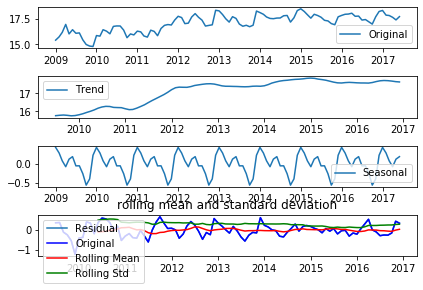

Result of Dickey-Fuller Test:
Test Statistic                 -1.440646
p-value                         0.562643
#Lags Used                     12.000000
Number of Observations Used    89.000000
Critical Values (1%)           -3.506057
Critical Values (5%)           -2.894607
Critical Values (10%)          -2.584410
dtype: float64


In [160]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(training_data_logscale)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(training_data_logscale, label='Original')
plt.legend(loc='best')

plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')

plt.subplot(413)
plt.plot(seasonal, label='Seasonal')
plt.legend(loc='best')

plt.subplot(414)
plt.plot(residual, label='Residual')
plt.legend(loc='best')

plt.tight_layout()

decompositionlogdata = residual
decompositionlogdata.dropna(inplace=True)
test_stationarity(decompositionlogdata)

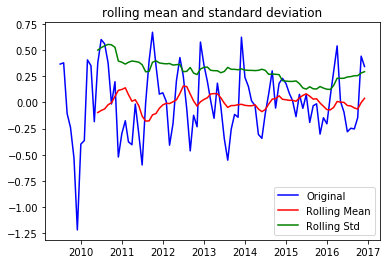

Result of Dickey-Fuller Test:
Test Statistic                 -1.440646
p-value                         0.562643
#Lags Used                     12.000000
Number of Observations Used    89.000000
Critical Values (1%)           -3.506057
Critical Values (5%)           -2.894607
Critical Values (10%)          -2.584410
dtype: float64


In [161]:
decompositionlogdata = residual
decompositionlogdata.dropna(inplace=True)
test_stationarity(decompositionlogdata)

/home/redeye/.local/lib/python3.6/site-packages/statsmodels/tsa/stattools.py:572: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  FutureWarning


Text(0.5, 1.0, 'Autocorrelation function')

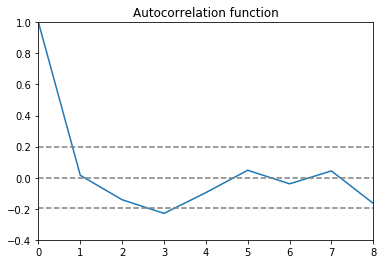

In [162]:
from statsmodels.tsa.stattools import acf, pacf

lag_acf = acf(datasetlogdiffshifting,nlags=20)
lag_pacf = pacf(datasetlogdiffshifting, nlags=20, method='ols')

#plt.subplot(121)
plt.axis([0, 8, -0.4, 1.0])
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(datasetlogdiffshifting)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(datasetlogdiffshifting)),linestyle='--',color='gray')
plt.title('Autocorrelation function')



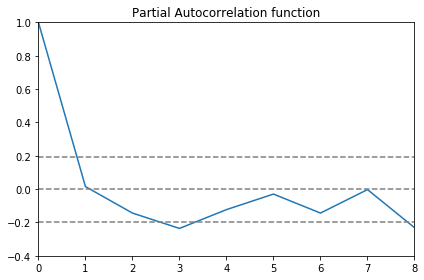

In [163]:
#plt.subplot(122)
plt.axis([0, 8, -0.4, 1.0])
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(datasetlogdiffshifting)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(datasetlogdiffshifting)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation function')
plt.tight_layout()

/home/redeye/.local/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/redeye/.local/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


Plotting AR model


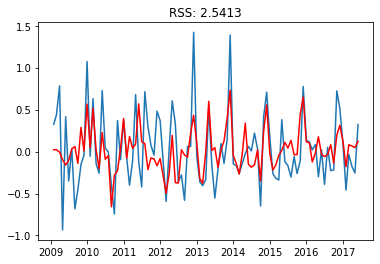

In [164]:
from statsmodels.tsa.arima_model import ARIMA
model = ARIMA(training_data_logscale,order=(12,1,2))
results_ar = model.fit(disp=-1)
results_ar.fittedvalues
plt.plot(datasetlogdiffshifting)
plt.plot(results_ar.fittedvalues,color='red')
results_ar.fittedvalues
rss = np.log(sum((results_ar.fittedvalues-datasetlogdiffshifting["Quantity"])**2))
plt.title('RSS: %.4f'% rss)
print('Plotting AR model')

In [165]:
predic_arima_diff = pd.Series(results_ar.fittedvalues, copy=False)
print(predic_arima_diff.head())

Month
2009-02-01    0.020739
2009-03-01    0.023091
2009-04-01   -0.007710
2009-05-01   -0.096611
2009-06-01   -0.161112
dtype: float64


In [166]:
predic_arima_diff_cumsum = predic_arima_diff.cumsum()
print(predic_arima_diff_cumsum.head())

Month
2009-02-01    0.020739
2009-03-01    0.043829
2009-04-01    0.036120
2009-05-01   -0.060491
2009-06-01   -0.221603
dtype: float64


In [167]:
predic_arima_log = pd.Series(training_data_logscale['Quantity'],index=training_data_logscale.index)
predic_arima_log = predic_arima_log.add(predic_arima_diff_cumsum, fill_value=0)
predic_arima=np.exp(predic_arima_log)
predic_arima

Month
2009-01-01    4.889152e+06
2009-02-01    6.901087e+06
2009-03-01    1.093764e+07
2009-04-01    2.372815e+07
2009-05-01    8.468603e+06
                  ...     
2017-02-01    3.882151e+08
2017-03-01    4.066789e+08
2017-04-01    3.638094e+08
2017-05-01    2.956764e+08
2017-06-01    4.612101e+08
Length: 102, dtype: float64

In [168]:
predic_arima = np.exp(predic_arima_log)
exp_log_indexdata = np.exp(training_data_logscale)
# plt.plot(exp_log_indexdata)
# plt.plot(predic_arima)

In [169]:
#indexdata_logscale
# exp_log_indexdata
predic_arima

Month
2009-01-01    4.889152e+06
2009-02-01    6.901087e+06
2009-03-01    1.093764e+07
2009-04-01    2.372815e+07
2009-05-01    8.468603e+06
                  ...     
2017-02-01    3.882151e+08
2017-03-01    4.066789e+08
2017-04-01    3.638094e+08
2017-05-01    2.956764e+08
2017-06-01    4.612101e+08
Length: 102, dtype: float64

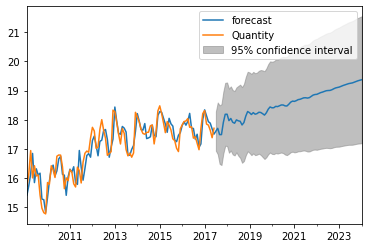

In [170]:
np.exp(training_data_logscale)
# x =results_ar.plot_predict(1,180)
x=results_ar.plot_predict(start=1, end=180, exog=None, dynamic=False, alpha=0.05, plot_insample=True, ax=None)
# print arma_order_select_ic(df.AverageTemperature, ic=['aic', 'bic'], trend='nc',
#             max_ar=4, max_ma=4, fit_kw={'method': 'css-mle'})

In [171]:
pred=results_ar.forecast(steps = 60)[0]
# pred
# pred = np.exp(pred)
y = pred.tolist()
s = pd.Series(y, copy = False)
# type(s)
s=np.exp(s)
s

0     4.448001e+07
1     4.895639e+07
2     3.947780e+07
3     3.952708e+07
4     5.984487e+07
5     7.912948e+07
6     7.935359e+07
7     6.363641e+07
8     6.858667e+07
9     6.031834e+07
10    5.827938e+07
11    6.535301e+07
12    6.330207e+07
13    6.238136e+07
14    5.494704e+07
15    5.971758e+07
16    7.440271e+07
17    8.695868e+07
18    8.365599e+07
19    7.853152e+07
20    8.372050e+07
21    7.938972e+07
22    8.094293e+07
23    8.484879e+07
24    8.419231e+07
25    8.078059e+07
26    7.701438e+07
27    8.332108e+07
28    9.420355e+07
29    1.017024e+08
30    9.877412e+07
31    9.916741e+07
32    1.037883e+08
33    1.029410e+08
34    1.057771e+08
35    1.088595e+08
36    1.087730e+08
37    1.055217e+08
38    1.051034e+08
39    1.115586e+08
40    1.198082e+08
41    1.241667e+08
42    1.230608e+08
43    1.262198e+08
44    1.306344e+08
45    1.321739e+08
46    1.356552e+08
47    1.389238e+08
48    1.393553e+08
49    1.377529e+08
50    1.398543e+08
51    1.461390e+08
52    1.5262

In [172]:
training_data=training_data.reset_index()
training_data

,Month,Quantity
0,2009-01-01,4889152
1,2009-02-01,6759443
2,2009-03-01,10468605
3,2009-04-01,22886390
4,2009-05-01,8996689
...,...,...
97,2017-02-01,56670622
98,2017-03-01,54716003
99,2017-04-01,45823553
100,2017-05-01,35528376


In [173]:
type(training_data.Month[1])

pandas._libs.tslibs.timestamps.Timestamp

In [174]:
for x in range(len(s)):
    if(training_data.Month[len(training_data)-1].month < 12):
        m = training_data.Month[len(training_data)-1].month + 1
        y = training_data.Month[len(training_data)-1].year
    else:
        y = training_data.Month[len(training_data)-1].year + 1 
        m = 1
    d = '{}-{}'.format(y,m)
    d = datetime.strptime(d, '%Y-%m')
    training_data = training_data.append({'Month': d, 'Quantity': s[x]}, ignore_index=True)

/usr/lib/python3/dist-packages/ipykernel_launcher.py:9: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime instead.
  if __name__ == '__main__':


In [175]:
training_data

,Month,Quantity
0,2009-01-01,4.889152e+06
1,2009-02-01,6.759443e+06
2,2009-03-01,1.046860e+07
3,2009-04-01,2.288639e+07
4,2009-05-01,8.996689e+06
...,...,...
157,2022-02-01,1.612782e+08
158,2022-03-01,1.659276e+08
159,2022-04-01,1.690781e+08
160,2022-05-01,1.732535e+08


In [176]:
training_data.set_index("Month", inplace = True)
training_data

,Quantity
Month,
2009-01-01,4.889152e+06
2009-02-01,6.759443e+06
2009-03-01,1.046860e+07
2009-04-01,2.288639e+07
2009-05-01,8.996689e+06
...,...
2022-02-01,1.612782e+08
2022-03-01,1.659276e+08
2022-04-01,1.690781e+08


In [177]:
original_data_plot = training_data[:len_training]
original_data_plot

,Quantity
Month,
2009-01-01,4889152.0
2009-02-01,6759443.0
2009-03-01,10468605.0
2009-04-01,22886390.0
2009-05-01,8996689.0
...,...
2017-02-01,56670622.0
2017-03-01,54716003.0
2017-04-01,45823553.0


In [188]:
predicted_data = training_data[len_training:]
predicted_data

,Quantity
Month,
2017-07-01,4.448001e+07
2017-08-01,4.895639e+07
2017-09-01,3.947780e+07
2017-10-01,3.952708e+07
2017-11-01,5.984487e+07
2017-12-01,7.912948e+07
2018-01-01,7.935359e+07
2018-02-01,6.363641e+07
2018-03-01,6.858667e+07


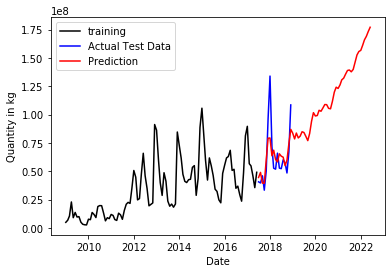

In [190]:
# plt.figure(figsize=(7,5), dpi=100)
plt.xlabel("Date")
plt.ylabel("Quantity in kg")
plt.plot(original_data_plot,color = 'black', label='training')
plt.plot(test_data, color = 'blue', label='Actual Test Data')
plt.plot(predicted_data, color = 'red',label='Prediction')
plt.legend(loc='best')